In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
sns.set_palette("Set2")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("results.csv")

In [3]:
# Convert string representation of dictionary to actual dictionary
df['configuration'] = df['configuration'].apply(ast.literal_eval)

# Split the 'configuration' column into multiple columns
df_split = pd.json_normalize(df['configuration'])

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, df_split], axis=1)

# Drop the original 'configuration' column
df = df.drop('configuration', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             375 non-null    int64  
 1   fitness_instance_1                     375 non-null    float64
 2   time_instance_1                        375 non-null    float64
 3   fitness_instance_2                     375 non-null    float64
 4   time_instance_2                        375 non-null    float64
 5   fitness_instance_3                     375 non-null    float64
 6   time_instance_3                        375 non-null    float64
 7   fitness_instance_4                     375 non-null    float64
 8   time_instance_4                        375 non-null    float64
 9   fitness_instance_5                     375 non-null    float64
 10  time_instance_5                        375 non-null    float64
 11  fitnes

In [4]:
df.head()

,Unnamed: 0,fitness_instance_1,time_instance_1,fitness_instance_2,time_instance_2,fitness_instance_3,time_instance_3,fitness_instance_4,time_instance_4,fitness_instance_5,...,rank_instance_5,rank_instance_6,rank_instance_7,rank_instance_8,average_rank,median_rank,population_size,cross_rate,mut_rate,early_stopping_limit
0,4,44.666667,0.621655,53.666667,0.729082,1957.666667,3.574410,2339.666667,3.802462,66896.666667,...,6,4,17,5,15.875,7.0,400,1.0,0.5,100
1,16,43.666667,0.641451,54.000000,0.612165,1978.666667,2.724785,2172.666667,3.383597,70488.000000,...,42,73,21,17,23.625,16.5,400,0.7,0.5,100
2,23,43.666667,0.965563,55.000000,1.069417,2075.333333,5.126052,2199.666667,4.836500,66585.000000,...,5,20,37,24,24.250,22.0,400,0.6,0.5,100
3,69,44.666667,0.660749,54.333333,0.611957,2002.666667,4.870156,2243.666667,4.288802,67849.000000,...,10,30,13,70,24.875,20.0,400,0.9,0.4,50
4,17,45.000000,0.408954,55.666667,0.380486,1930.333333,2.255713,2270.666667,3.032679,69706.666667,...,30,7,16,18,26.875,23.5,400,0.7,0.5,50


/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


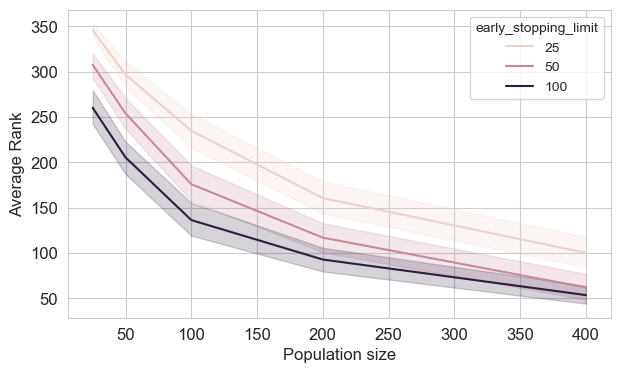

In [5]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.lineplot(data=df, x="population_size", y="average_rank", hue="early_stopping_limit")

ax.set_xlabel('Population size', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("populations_sizes_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


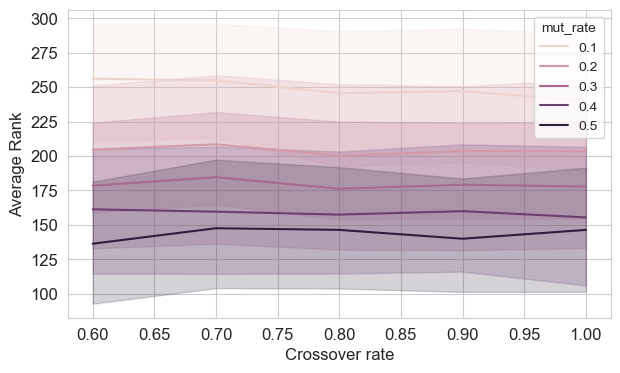

In [6]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.lineplot(data=df, x="cross_rate", y="average_rank", hue="mut_rate")

ax.set_xlabel('Crossover rate', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("crossover_rates_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


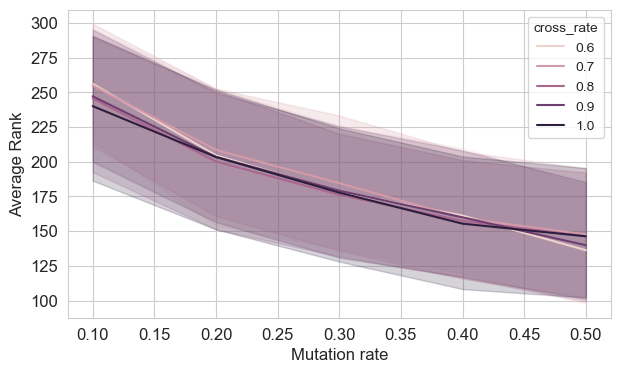

In [7]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.lineplot(data=df, x="mut_rate", y="average_rank", hue="cross_rate")

ax.set_xlabel('Mutation rate', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("mutation_rates_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()

/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danieleborghesi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


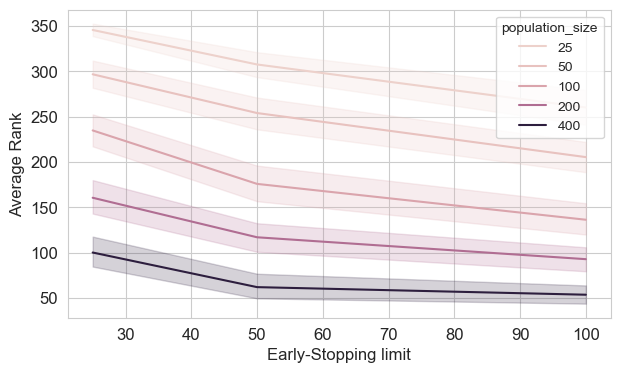

In [8]:
# You can adjust the figsize parameter to change the dimensions
plt.figure(figsize=(7, 4))

# Create the bar plot
ax = sns.lineplot(data=df, x="early_stopping_limit", y="average_rank", hue="population_size")

ax.set_xlabel('Early-Stopping limit', fontsize=12)
ax.set_ylabel('Average Rank', fontsize=12)

# Increase font size for tick labels on both axes
ax.tick_params(axis='both', labelsize=12)

plt.savefig("early_stopping_limits_comparison.png", bbox_inches='tight')
# Show the plot
plt.show()